In [15]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
import warnings
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

In [19]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [34]:
#Step 1 Load Data
f = open('sp500.csv', 'r').read()
data = f.split('\n')

seq_len=50 
normalise_window=True
sequence_length = seq_len + 1
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

#every element in result is a sequence_length list
#print(result[1])

if normalise_window:
    result = normalise_windows(result)
    
result = np.array(result)
print(result.shape[0],result.shape[1])

row = round(0.9 * result.shape[0])
print(row)

train = result[:int(row), :]
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]

x_test = result[int(row):, :-1]
y_test = result[int(row):, -1]
print(x_train[:2])

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train[:2])

4121 51
3709
[[ 0.          0.00171696 -0.00639333 -0.00317798  0.00156764  0.00456435
   0.00442043  0.00306603  0.00494298 -0.00408984  0.00150366  0.00012797
   0.00164764  0.01133631  0.01176285  0.00700655 -0.00242085  0.00131704
   0.00516689 -0.00136508  0.00673994  0.00911809  0.01340522  0.01947329
   0.01833753  0.02380306  0.02569062  0.02643714  0.0260479   0.02798884
   0.03469675  0.03948508  0.04046092  0.04020498  0.03652574  0.02917791
   0.03240394  0.03326775  0.0355126   0.0435056   0.04483865  0.04664629
   0.04650764  0.03977304  0.04486534  0.04363357  0.04562781  0.04523857
   0.05221843  0.05291165]
 [ 0.          0.02001002  0.05338718  0.05708669  0.05145594  0.02866551
   0.0698605   0.08222715  0.08050538  0.10601813  0.09058016  0.10445918
   0.1199786   0.09457051  0.10281886  0.08754377  0.0678246   0.06774315
   0.06573054  0.02146424  0.03935691  0.02277885  0.03996181  0.05047874
   0.05818026  0.05802902  0.03180656  0.03518037  0.03668109  0.0162290

In [35]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.0656745433807373


In [85]:
#Step 3 Train the model
model.fit(
    x_train,
    y_train,
    batch_size=512,
    nb_epoch=5,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/5
3523/3523 [==============================] - 7s - loss: 6.5897e-04 - val_loss: 7.1564e-04
Epoch 2/5
3523/3523 [==============================] - 7s - loss: 8.0772e-04 - val_loss: 4.5525e-04
Epoch 3/5
3523/3523 [==============================] - 7s - loss: 5.7793e-04 - val_loss: 5.4226e-04
Epoch 4/5
3523/3523 [==============================] - 6s - loss: 6.4579e-04 - val_loss: 4.5354e-04
Epoch 5/5
3523/3523 [==============================] - 6s - loss: 5.6029e-04 - val_loss: 3.4884e-04


In [82]:
len(x_test)

412

In [97]:
#Step 4 - Plot the predictions!
window_size = 50
prediction_len = 5
#Predict sequence of 50 steps before shifting prediction run forward by 50 steps
prediction_seqs = []
for i in range(int(len(x_test)/prediction_len)):
    curr_frame = x_test[i*prediction_len]
    predicted = []
    for j in range(1):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    prediction_seqs.append(predicted)
predictions = prediction_seqs

correct = 0
for i in range(int(len(x_test)/prediction_len)):
    last_frame = i * prediction_len
    difference_true = y_test[last_frame+1] - y_test[last_frame]
    difference_predict = predictions[i][0] - y_test[last_frame]
    if (difference_true>0 and difference_predict >0) or (difference_true<0 and difference_predict<0):
        correct += 1
print(float(correct/len(predictions)))



0.4878048780487805


yo


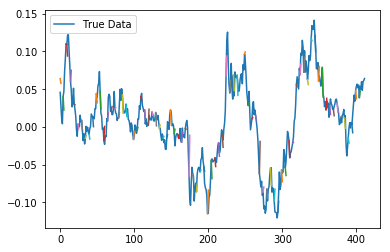

In [99]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True Data')
print('yo')
#Pad the list of predictions to shift it in the graph to it's correct start
for i, data in enumerate(predictions):
    padding = [None for p in range(i * prediction_len-1)]
    plt.plot(padding + [y_test[i*prediction_len-1]] + data, label='')
    plt.legend()
plt.show()

In [88]:
test = [1,2,3,4,5,6,7,8,9]
a = [None for x in range(9)]
print(a)

[None, None, None, None, None, None, None, None, None]
